## This explores the sizes of objects

In [1]:
import os
import tables_io
import numpy as np
import matplotlib.pyplot as plt
import pyccl as ccl

Change this to be the root of the current PZ working area

In [2]:
HOME = os.environ['HOME']
pz_dir = f'{HOME}/macss'

#### Set up the cosmology & the evaluation grids

In [3]:
cosmo = ccl.Cosmology(
    Omega_c=0.25, Omega_b=0.05,
    h=0.7, n_s=0.95, sigma8=0.8,
    transfer_function='bbks'
)

z_grid = np.linspace(0., 6., 301)[1:]
a_grid = (1/(1+z_grid))
D_a = cosmo.angular_diameter_distance(a_grid)
rad_to_asec = 360*60*60/(2*np.pi) 
ang_scale = D_a * 1000/ rad_to_asec
dist_mod = cosmo.distance_modulus(a_grid)

#### Plot the apparent magntidue of the MW-like object (abs mag -20)

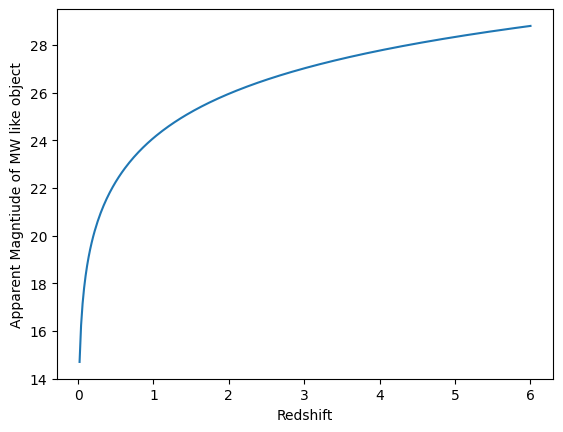

In [4]:
_ = plt.plot(z_grid, dist_mod-20)
_ = plt.ylabel("Apparent Magntiude of MW like object")
_ = plt.xlabel("Redshift")

#### Plot the angular scale as a function of redshift

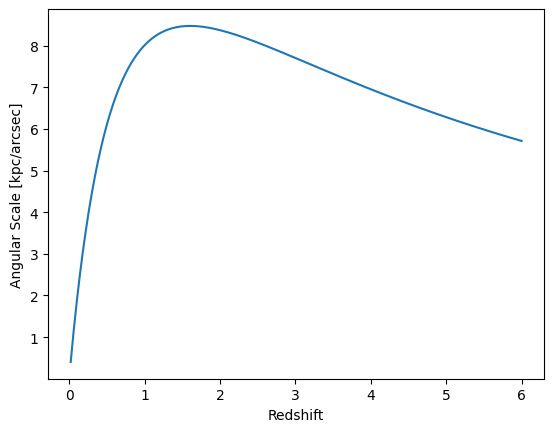

In [5]:
_ = plt.plot(z_grid, ang_scale)
_ = plt.ylabel("Angular Scale [kpc/arcsec]")
_ = plt.xlabel("Redshift")

#### Plot the locus for MW-like and significantly brighter galaxy

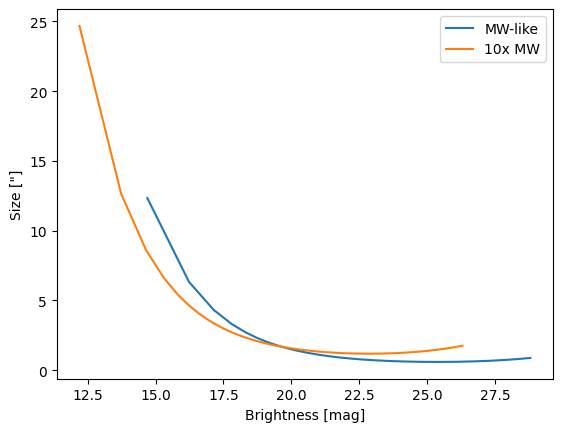

In [6]:
_ = plt.plot(dist_mod-20, 5/ang_scale, label="MW-like")
_ = plt.plot(dist_mod-22.5, 10/ang_scale, label="10x MW")
_ = plt.xlabel('Brightness [mag]')
_ = plt.ylabel('Size ["]')
_ = plt.legend()

In [7]:
t = tables_io.read(f'{pz_dir}/data/object.hdf5')

In [8]:
def r_95_of_n(n):
    return 1.25 + 1.125*n

In [9]:
blendedness = t['i_blendedness']
blendedness = np.where(np.isnan(blendedness), 0., blendedness).clip(0., 1.)
mask  = np.bitwise_and(
    np.bitwise_and(
        t['i_extendedness'] == 1,
        t['g_psfFlux'] / t['g_psfFluxErr'] > 10,
    ),
    np.bitwise_and(
        t['i_psfFlux'] / t['i_psfFluxErr'] > 10,
        t['r_psfFlux'] / t['r_psfFluxErr'] > 10,
    ),
)
mask_unblend = np.bitwise_and(mask, blendedness<0.1)
mask_blend = np.bitwise_and(mask, blendedness>0.1)
blend = t['detect_fromBlend']
psf_flux = t['i_psfFlux']
cModel_flux = t['i_cModelFlux']
cModel_flux = t['i_sersicFlux']
shape_xx = t['i_ixx']
shape_yy = t['i_iyy']
shape_xy = t['i_ixy']
psf_xx = t['i_ixxDebiasedPSF']
psf_yy = t['i_iyyDebiasedPSF']
psf_xy = t['i_ixyDebiasedPSF']
shape_det = shape_xx*shape_yy - shape_xy*shape_xy
shape_trace = shape_xx + shape_yy
shape_area = np.sqrt(shape_det)
psf_det = psf_xx*psf_yy - psf_xy*psf_xy
psf_trace = psf_xx + psf_yy
sersic_x = t['sersic_reff_x']
sersic_y = t['sersic_reff_y']
sersic_rho = t['sersic_rho']
sersic_index = t['sersic_index']
sersic_factor = r_95_of_n(sersic_index)
sersic_xx = sersic_x*sersic_x
sersic_yy = sersic_y*sersic_y
sersic_trace = sersic_xx + sersic_yy
sersic_xy = sersic_x*sersic_y*sersic_rho
sersic_det = sersic_xx*sersic_yy - sersic_xy*sersic_xy
sqrt_sersic_trace = np.sqrt(sersic_trace)
sqrt_sersic_det = np.sqrt(sersic_det)
bdReB = t['i_bdReB']
bdReD = t['i_bdReD']
kron_rad = t['i_kronRad']
psf_mag = -2.5 * np.log10(t['i_psfFlux']) + 31.4
cModel_mag = -2.5 * np.log10(t['i_cModelFlux']) + 31.4
sersic_mag = -2.5 * np.log10(t['i_sersicFlux']) + 31.4

/var/folders/26/trd4y7vd4734y5jcm_1fkn448vb1ml/T/ipykernel_25283/1712885470.py:45: RuntimeWarning: invalid value encountered in log10
  psf_mag = -2.5 * np.log10(t['i_psfFlux']) + 31.4
/var/folders/26/trd4y7vd4734y5jcm_1fkn448vb1ml/T/ipykernel_25283/1712885470.py:46: RuntimeWarning: divide by zero encountered in log10
  cModel_mag = -2.5 * np.log10(t['i_cModelFlux']) + 31.4
/var/folders/26/trd4y7vd4734y5jcm_1fkn448vb1ml/T/ipykernel_25283/1712885470.py:46: RuntimeWarning: invalid value encountered in log10
  cModel_mag = -2.5 * np.log10(t['i_cModelFlux']) + 31.4


In [10]:
clean_sqrt_shape_trace = np.nan_to_num(np.sqrt(shape_trace[mask])).clip(0, 5)
clean_sqrt_sersic_trace = np.nan_to_num(sqrt_sersic_trace[mask]).clip(0, 5)
clean_sersic_index = np.nan_to_num(sersic_index[mask]).clip(0, 10)
clean_psf_mag = np.nan_to_num(psf_mag[mask]).clip(20, 28)

In [11]:
labels = [r'$\sqrt{T_{\rm shape}}$ [pix]', r'$\sqrt{T_{\rm Sersic}}$ [pix]', r'$n_{\rm Sersic}$', r'$mag_{\rm PSF}$']
vals = np.vstack([clean_sqrt_shape_trace, clean_sqrt_sersic_trace, clean_sersic_index, clean_psf_mag]).T

In [12]:
sersic_g = t['g_sersicFlux']

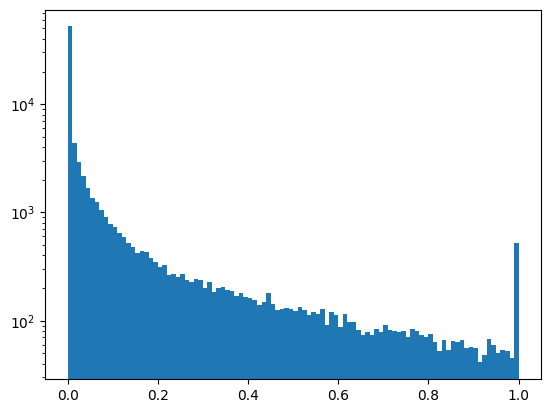

In [13]:
_ = plt.hist(blendedness, bins=np.linspace(0., 1., 101))
_ = plt.yscale('log')

In [14]:
mask.sum()/mask.size

np.float64(0.24919929990832132)

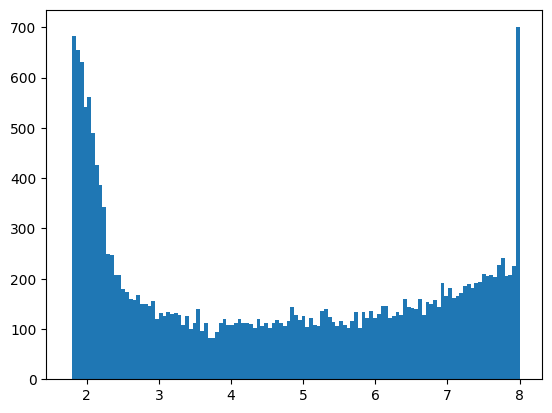

In [15]:
_ = plt.hist(sersic_factor[mask], bins=np.linspace(1.75, 8, 121))

In [16]:
np.where(np.isnan(blendedness), 0., blendedness).clip(0., 1.)

array([0., 0., 0., ..., 0., 0., 0.], shape=(83989,), dtype=float32)

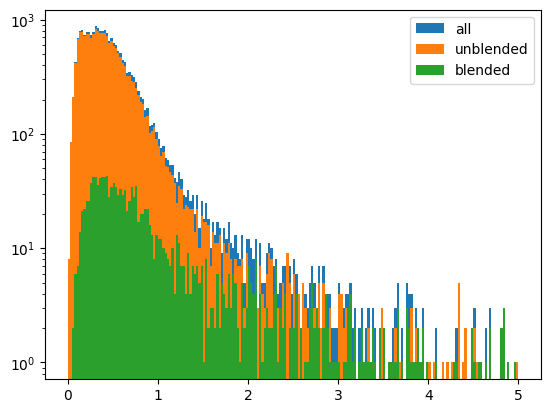

In [17]:
_ = plt.hist(np.sqrt(sersic_trace[mask])*0.2, bins=np.linspace(0, 5, 201), label='all')
_ = plt.hist(np.sqrt(sersic_trace[mask_unblend])*0.2, bins=np.linspace(0, 5, 201), label='unblended')
_ = plt.hist(np.sqrt(sersic_trace[mask_blend])*0.2, bins=np.linspace(0, 5, 201), label='blended')

_ = plt.yscale('log')
_ = plt.legend()

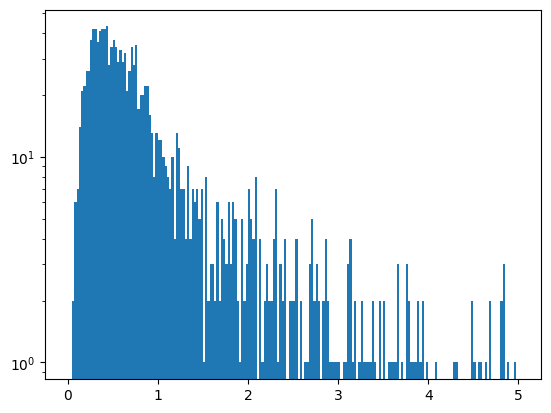

In [18]:
_ = plt.hist(np.sqrt(sersic_trace[mask_blend])*0.2, bins=np.linspace(0, 5, 201), label='all')
_ = plt.yscale('log')

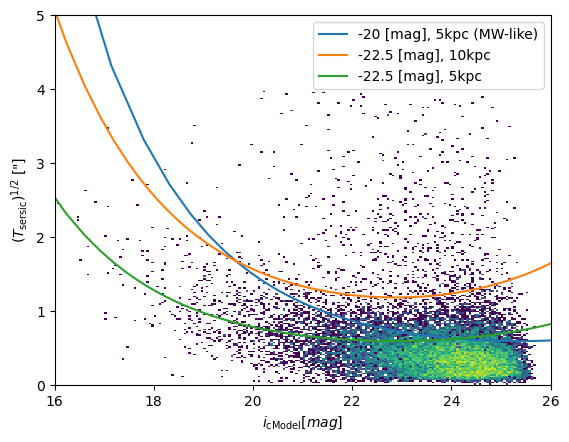

In [19]:
#_ = plt.hist2d(psf_mag[mask], np.sqrt(shape_trace[mask]-psf_trace[mask])*0.2, bins=(np.linspace(18, 26, 201), np.linspace(0, 4, 201)), norm='log')
_ = plt.hist2d(cModel_mag[mask], np.sqrt(sersic_trace[mask])*0.2, bins=(np.linspace(16, 26, 201), np.linspace(0, 4, 201)), norm='log')
_ = plt.xlabel(r'$i_{\rm cModel} [mag]$')
_ = plt.ylabel(r'$(T_{\rm sersic})^{1/2}$ ["]')
_ = plt.plot(dist_mod-20, 5./ang_scale, label="-20 [mag], 5kpc (MW-like)")
_ = plt.plot(dist_mod-22.5, 10./ang_scale, label="-22.5 [mag], 10kpc")
_ = plt.plot(dist_mod-22.5, 5./ang_scale, label="-22.5 [mag], 5kpc")
_ = plt.ylim(0, 5.)
_ = plt.legend()

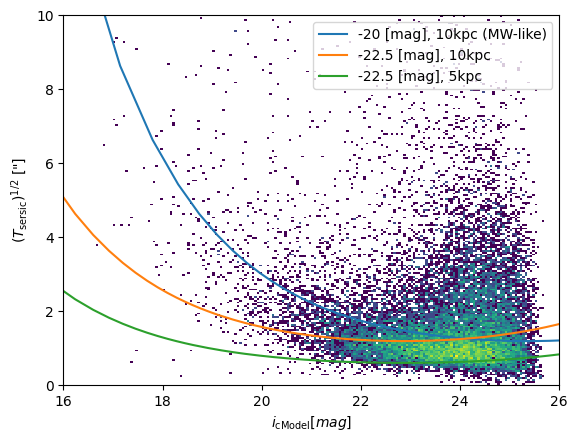

In [20]:
#_ = plt.hist2d(psf_mag[mask], np.sqrt(shape_trace[mask]-psf_trace[mask])*0.2, bins=(np.linspace(18, 26, 201), np.linspace(0, 4, 201)), norm='log')
_ = plt.hist2d(cModel_mag[mask_unblend], sersic_factor[mask_unblend]*np.sqrt(sersic_trace[mask_unblend])*0.2, bins=(np.linspace(16, 26, 201), np.linspace(0, 10, 201)), norm='log')
_ = plt.xlabel(r'$i_{\rm cModel} [mag]$')
_ = plt.ylabel(r'$(T_{\rm sersic})^{1/2}$ ["]')
_ = plt.plot(dist_mod-20, 10./ang_scale, label="-20 [mag], 10kpc (MW-like)")
_ = plt.plot(dist_mod-22.5, 10./ang_scale, label="-22.5 [mag], 10kpc")
_ = plt.plot(dist_mod-22.5, 5./ang_scale, label="-22.5 [mag], 5kpc")
_ = plt.ylim(0, 10.)
_ = plt.legend()

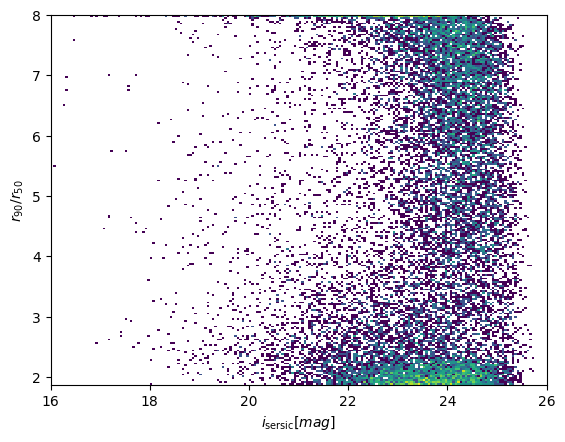

In [21]:
_ = plt.hist2d(sersic_mag[mask_unblend], sersic_factor[mask_unblend], bins=(np.linspace(16, 26, 201), np.linspace(1.875, 8., 201)), norm="log")
_ = plt.xlabel(r'$i_{\rm sersic} [mag]$')
_ = plt.ylabel(r"$r_{90}/r_{50}$")

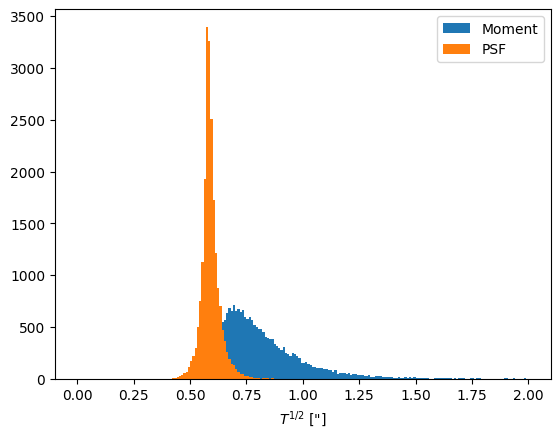

In [22]:
_ = plt.hist(np.sqrt(shape_trace[mask])*0.2, np.linspace(0, 2, 201), label='Moment')
_ = plt.hist(np.sqrt(psf_trace[mask])*0.2, np.linspace(0, 2, 201), label='PSF')
_ = plt.legend()
_ = plt.xlabel(r'$T^{1/2}$ ["]')

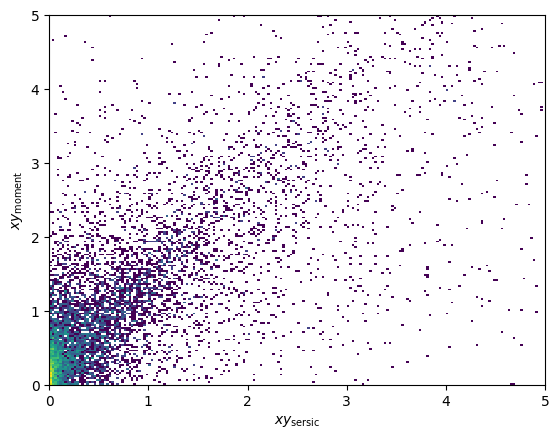

In [23]:
_ = plt.hist2d(sersic_xy[mask], shape_xy[mask], bins=(np.linspace(0, 5, 201), np.linspace(0, 5, 201)), norm='log')
_ = plt.xlabel(r'$xy_{\rm sersic}$')
_ = plt.ylabel(r'$xy_{\rm moment}$')

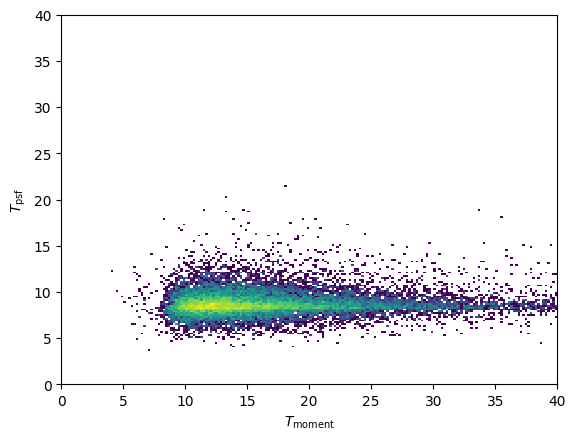

In [24]:
_ = plt.hist2d(shape_trace[mask], psf_trace[mask], bins=(np.linspace(0, 40, 201), np.linspace(0, 40., 201)), norm='log')
_ = plt.xlim(0, 40)
_ = plt.ylim(0, 40)
_ = plt.xlabel(r'$T_{\rm moment}$')
_ = plt.ylabel(r'$T_{\rm psf}$')

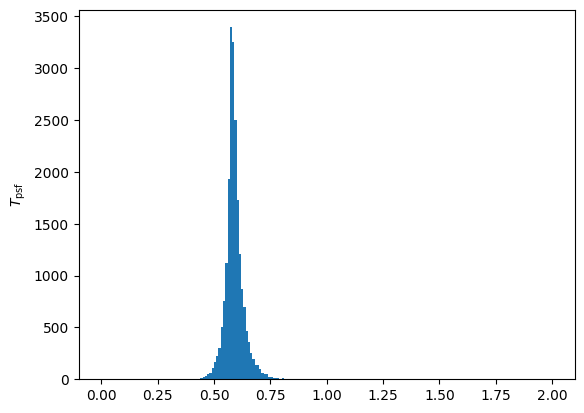

In [25]:
_ = plt.hist(np.sqrt(psf_trace[mask])*0.2, bins=(np.linspace(0, 2, 201)))
_ = plt.ylabel(r'$T_{\rm psf}$')

/var/folders/26/trd4y7vd4734y5jcm_1fkn448vb1ml/T/ipykernel_25283/1359574100.py:1: RuntimeWarning: invalid value encountered in sqrt
  _ = plt.hist2d(np.sqrt(shape_trace[mask]-psf_trace[mask])*0.2, np.sqrt(sersic_trace[mask])*0.2, bins=(np.linspace(0, 2, 201), np.linspace(0, 2., 201)), norm='log')


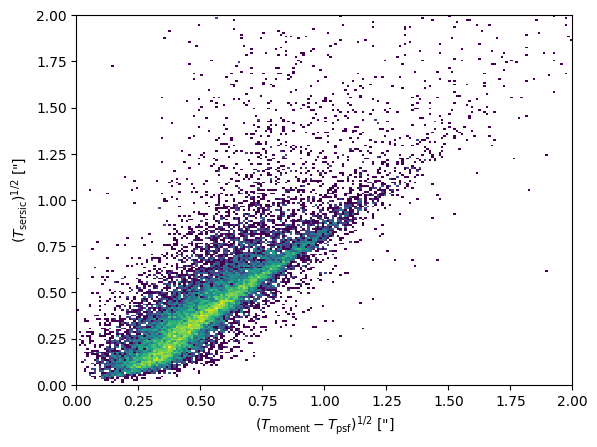

In [26]:
_ = plt.hist2d(np.sqrt(shape_trace[mask]-psf_trace[mask])*0.2, np.sqrt(sersic_trace[mask])*0.2, bins=(np.linspace(0, 2, 201), np.linspace(0, 2., 201)), norm='log')
_ = plt.xlabel(r'$(T_{\rm moment} - T_{\rm psf})^{1/2}$ ["]')
_ = plt.ylabel(r'$(T_{\rm sersic})^{1/2}$ ["]')

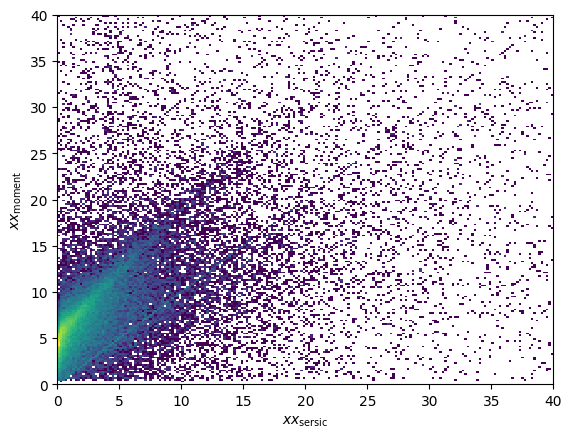

In [27]:
_ = plt.hist2d(sersic_xx, shape_xx, bins=(np.linspace(0, 40, 201), np.linspace(0, 40., 201)), norm='log')
_ = plt.xlim(0, 40)
_ = plt.ylim(0, 40)
_ = plt.xlabel(r'$xx_{\rm sersic}$')
_ = plt.ylabel(r'$xx_{\rm moment}$')

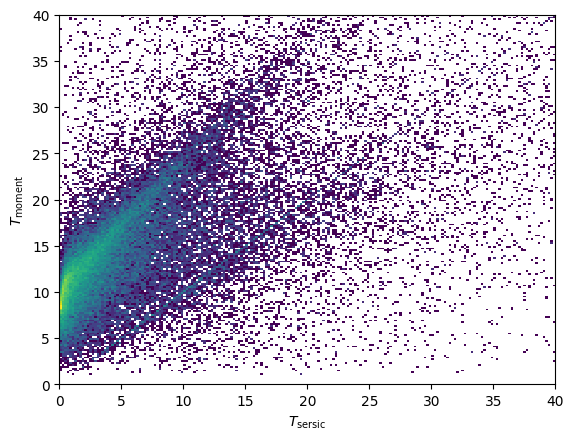

In [28]:
_ = plt.hist2d(sersic_trace, shape_trace, bins=(np.linspace(0, 40, 201), np.linspace(0, 40., 201)), norm='log')
_ = plt.xlim(0, 40)
_ = plt.ylim(0, 40)
_ = plt.xlabel(r'$T_{\rm sersic}$')
_ = plt.ylabel(r'$T_{\rm moment}$')

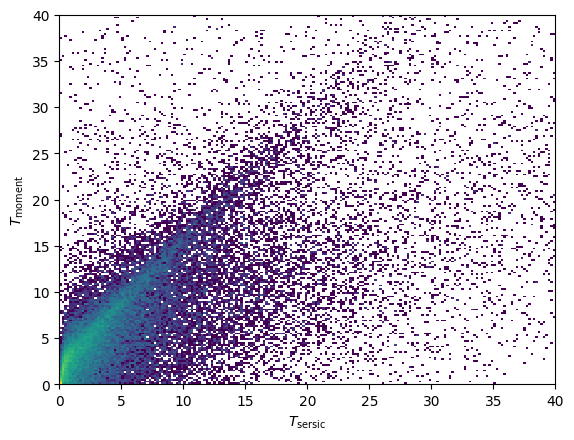

In [29]:
_ = plt.hist2d(sersic_trace, shape_trace-psf_trace, bins=(np.linspace(0, 40, 201), np.linspace(0, 40., 201)), norm='log')
_ = plt.xlim(0, 40)
_ = plt.ylim(0, 40)
_ = plt.xlabel(r'$T_{\rm sersic}$')
_ = plt.ylabel(r'$T_{\rm moment}$')

/var/folders/26/trd4y7vd4734y5jcm_1fkn448vb1ml/T/ipykernel_25283/328198262.py:1: RuntimeWarning: invalid value encountered in sqrt
  _ = plt.hist2d(np.sqrt(sersic_trace), np.sqrt(shape_trace-psf_trace), bins=(np.linspace(0, 10., 201), np.linspace(0, 10., 201)), norm='log')


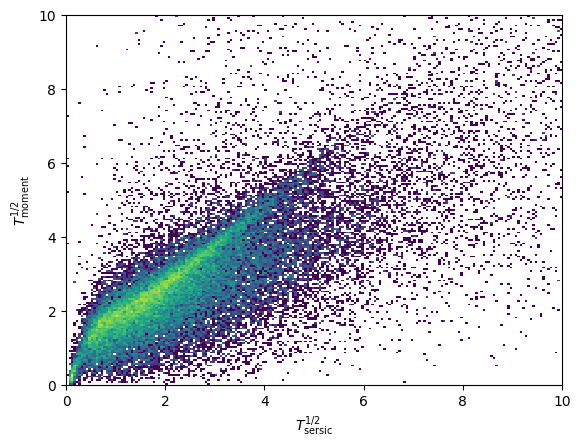

In [30]:
_ = plt.hist2d(np.sqrt(sersic_trace), np.sqrt(shape_trace-psf_trace), bins=(np.linspace(0, 10., 201), np.linspace(0, 10., 201)), norm='log')
_ = plt.xlabel(r'$T_{\rm sersic}^{1/2}$')
_ = plt.ylabel(r'$T_{\rm moment}^{1/2}$')


/var/folders/26/trd4y7vd4734y5jcm_1fkn448vb1ml/T/ipykernel_25283/52918161.py:1: RuntimeWarning: invalid value encountered in sqrt
  _ = plt.scatter(np.sqrt(sersic_trace), np.sqrt(shape_trace-psf_trace), c=sersic_index, s=1)


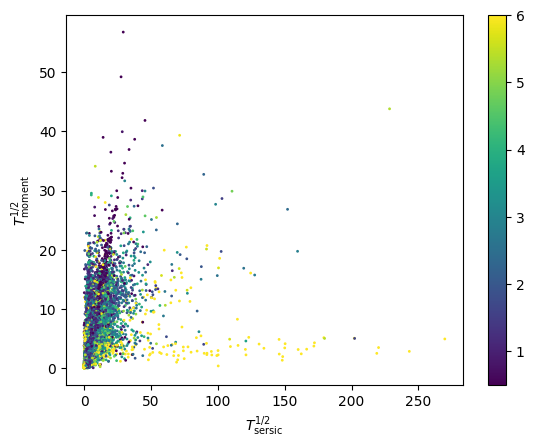

In [31]:
_ = plt.scatter(np.sqrt(sersic_trace), np.sqrt(shape_trace-psf_trace), c=sersic_index, s=1)
_ = plt.xlabel(r'$T_{\rm sersic}^{1/2}$')
_ = plt.ylabel(r'$T_{\rm moment}^{1/2}$')
_ = plt.colorbar()

In [32]:
clean_sersic_sqrt_trace = np.sqrt(np.nan_to_num(sersic_trace).clip(0, 100))
clean_shape_sqrt_trace = np.sqrt(np.nan_to_num(shape_trace-psf_trace).clip(0, 100))
clean_sersic_index = np.nan_to_num(sersic_index).clip(0, 8)
clean_psf_mag = np.nan_to_num(psf_mag).clip(18, 28)
vals = np.vstack([clean_sersic_sqrt_trace, clean_shape_sqrt_trace, clean_sersic_index, clean_psf_mag]).T

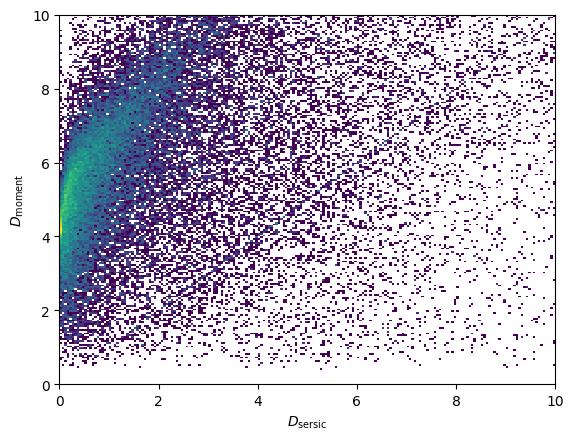

In [33]:
_ = plt.hist2d(np.sqrt(sersic_det), np.sqrt(shape_det), bins=(np.linspace(0, 10., 201), np.linspace(0, 10., 201)), norm='log')
_ = plt.xlabel(r'$D_{\rm sersic}$')
_ = plt.ylabel(r'$D_{\rm moment}$')

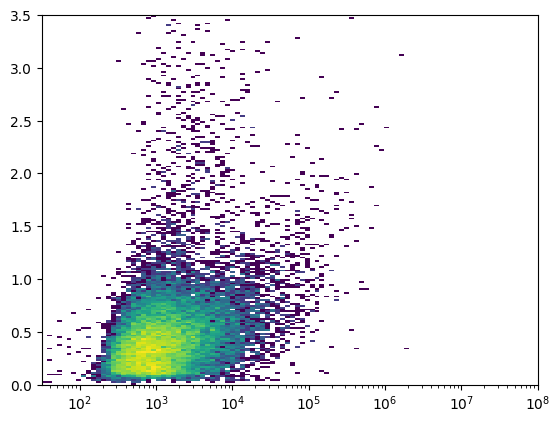

In [34]:
_ = plt.hist2d(t['i_kronFlux'][mask], sqrt_sersic_trace[mask]*0.2, bins=(np.logspace(1.5, 8, 101), np.linspace(0, 3.5, 200)), norm="log")
_ = plt.xscale('log')

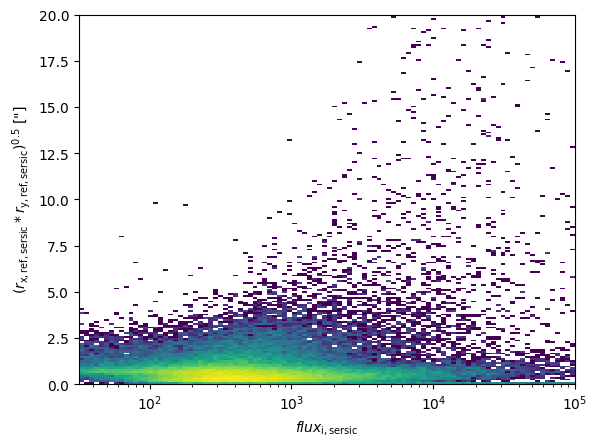

In [35]:
_ = plt.hist2d(t['i_sersicFlux'], sqrt_sersic_trace*0.2, bins=(np.logspace(1.5, 5, 101), np.linspace(0, 20., 200)), norm='log')
_ = plt.xscale('log')
_ = plt.xlabel(r'$flux_{\rm i, sersic}$')
_ = plt.ylabel(r'$(r_{\rm x, ref, sersic}*r_{\rm y, ref, sersic})^{0.5}$ ["]')

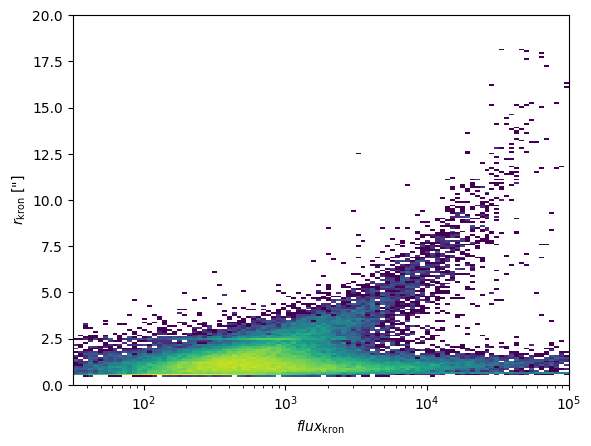

In [36]:
_ = plt.hist2d(t['i_kronFlux'], kron_rad*0.2, bins=(np.logspace(1.5, 5, 101), np.linspace(0, 20., 200)), norm="log")
_ = plt.xscale('log')
_ = plt.xlabel(r'$flux_{\rm kron}$')
_ = plt.ylabel(r'$r_{\rm kron}$ ["]')

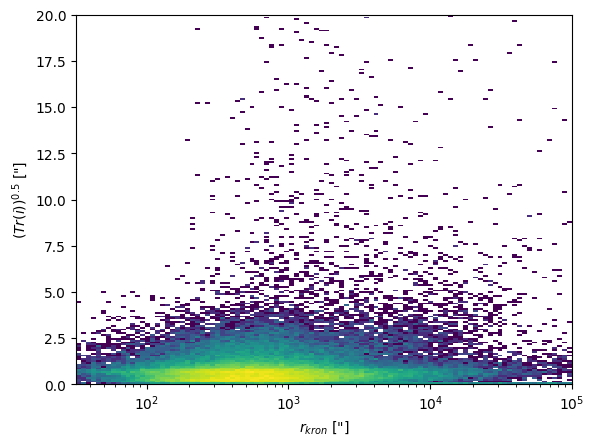

In [37]:
_ = plt.hist2d(t['i_kronFlux'], sqrt_sersic_trace*0.2, bins=(np.logspace(1.5, 5, 101), np.linspace(0, 20, 200)), norm="log")
_ = plt.xscale('log')
_ = plt.xlabel(r'$r_{kron}$ ["]')
_ = plt.ylabel(r'$(Tr(i))^{0.5}$ ["]')

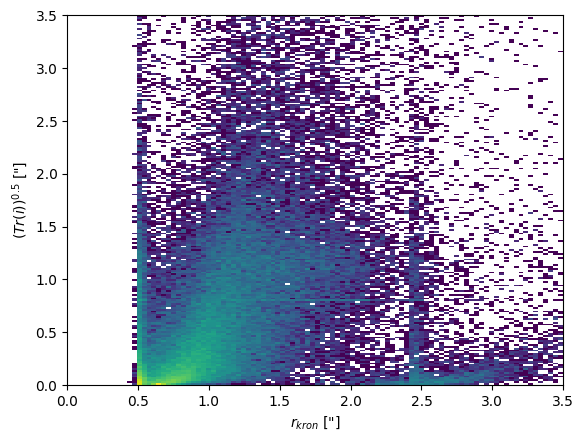

In [38]:
_ = plt.hist2d(t['i_kronRad']*0.2, sqrt_sersic_det*0.2, bins=(np.linspace(0., 3.5, 101), np.linspace(0, 3.5, 200)), norm="log")
_ = plt.xlabel(r'$r_{kron}$ ["]')
_ = plt.ylabel(r'$(Tr(i))^{0.5}$ ["]')

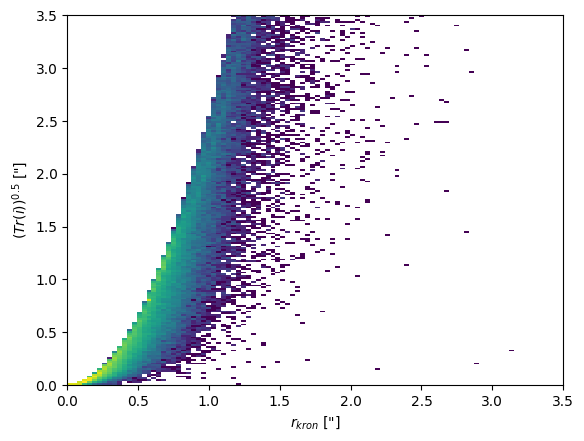

In [39]:
_ = plt.hist2d(sqrt_sersic_trace*0.2, sqrt_sersic_det*0.2, bins=(np.linspace(0., 3.5, 101), np.linspace(0, 3.5, 200)), norm="log")
_ = plt.xlabel(r'$r_{kron}$ ["]')
_ = plt.ylabel(r'$(Tr(i))^{0.5}$ ["]')

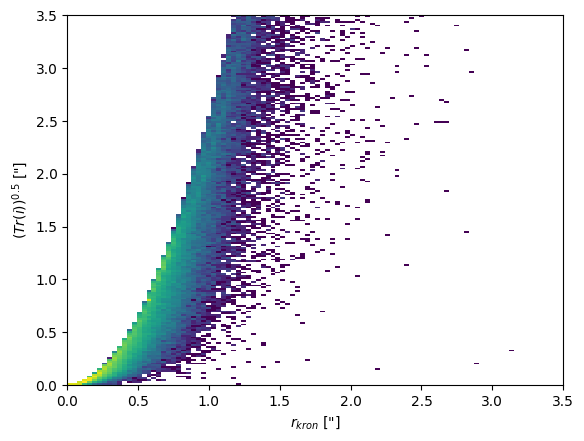

In [40]:
_ = plt.hist2d(sqrt_sersic_trace*0.2, sqrt_sersic_det*0.2, bins=(np.linspace(0., 3.5, 101), np.linspace(0, 3.5, 200)), norm="log")
_ = plt.xlabel(r'$r_{kron}$ ["]')
_ = plt.ylabel(r'$(Tr(i))^{0.5}$ ["]')